In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils import resample
import numpy as np

In [ ]:
df = pd.read_csv('timepurchased.csv')

In [ ]:
df.head()

,time,purchased
0,39,0
1,52,1
2,29,1
3,15,0
4,43,1


In [ ]:
X = df[['time']]
y = df['purchased']

In [ ]:
n_iterations = 1000
accuracies = []

In [ ]:
for i in range(n_iterations):
  X_resampled, y_resampled = resample(X, y, random_state=i)

  # Train model on bootstrap sample
  model = LogisticRegression()
  model.fit(X_resampled, y_resampled)

  # Make predictions on the original data
  y_pred = model.predict(X)

  # Calculate accuracy
  accuracy = accuracy_score(y, y_pred)
  accuracies.append(accuracy)


In [ ]:
  coef = model.coef_
  intercept = model.intercept_
  print(f"Coefficients: {coef}")
  print(f"Intercept: {intercept}")

Coefficients: [[0.18499391]]
Intercept: [-4.84140284]


In [ ]:
accuracies[:20]

[0.7959183673469388,
 0.8163265306122449,
 0.8775510204081632,
 0.8367346938775511,
 0.8979591836734694,
 0.8979591836734694,
 0.8571428571428571,
 0.8775510204081632,
 0.8571428571428571,
 0.8367346938775511,
 0.8979591836734694,
 0.8775510204081632,
 0.7551020408163265,
 0.8367346938775511,
 0.8571428571428571,
 0.8775510204081632,
 0.7959183673469388,
 0.8571428571428571,
 0.8775510204081632,
 0.8367346938775511]

In [ ]:
conf_matrix = confusion_matrix(y, y_pred)
print(conf_matrix)

[[17  4]
 [ 2 26]]


In [ ]:
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0])

In [ ]:
comparison_df = pd.DataFrame({'Actual': y.values, 'Predicted': y_pred})
print(comparison_df.head(10))

   Actual  Predicted
0       0          1
1       1          1
2       1          1
3       0          0
4       1          1
5       1          1
6       0          1
7       1          1
8       1          1
9       0          0


In [ ]:
print(f"Accuracy: {np.mean(accuracies)}")

Accuracy: 0.8451020408163266


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


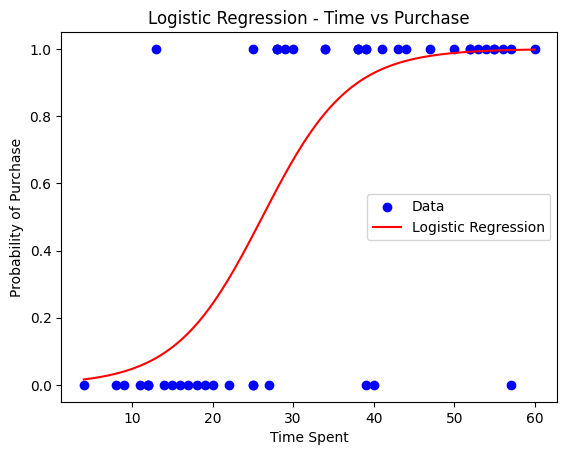

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the data points
plt.scatter(X['time'], y, color='blue', label='Data')

# Create a range of values from the minimum to maximum time
time_range = np.linspace(X['time'].min(), X['time'].max(), 300).reshape(-1, 1)

# Predict using the trained model
y_prob = model.predict_proba(time_range)[:, 1]  # Probability of class 1 (purchase)

# Plot the decision boundary (where the model's predicted probability is 0.5)
plt.plot(time_range, y_prob, color='red', label='Logistic Regression')

# Add labels and title
plt.xlabel('Time Spent')
plt.ylabel('Probability of Purchase')
plt.title('Logistic Regression - Time vs Purchase')
plt.legend()

plt.show()


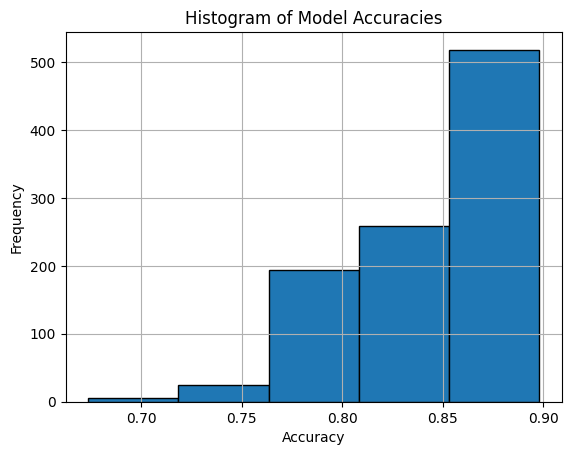

In [ ]:
plt.hist(accuracies, bins=5, edgecolor='black')  # You can adjust the number of bins
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Histogram of Model Accuracies')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification


In [ ]:
X, y = make_classification(
    n_samples=1000, n_features=20, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_logistic = logistic_model.predict_proba(X_test)[:, 1]
y_pred_rf = random_forest_model.predict_proba(X_test)[:, 1]

In [ ]:
test_df = pd.DataFrame({'True': y, 'Logistic': y_pred_logistic, 'Random Forest': y_pred_rf})
print(test_df.head())

ValueError: All arrays must be of the same length

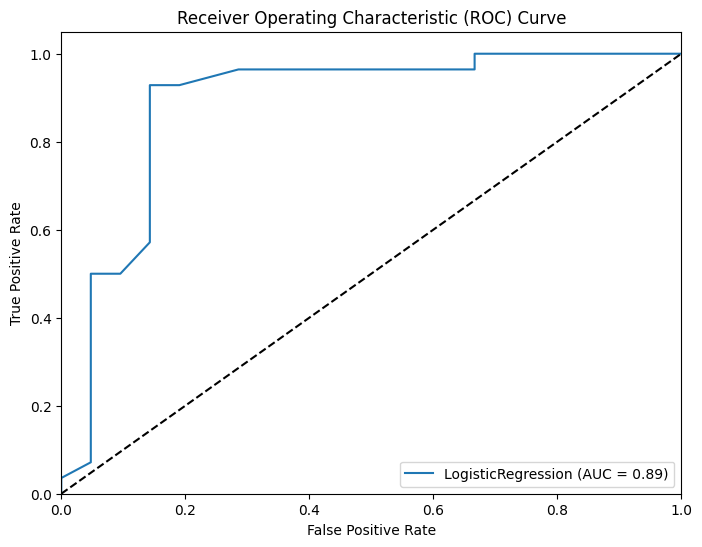

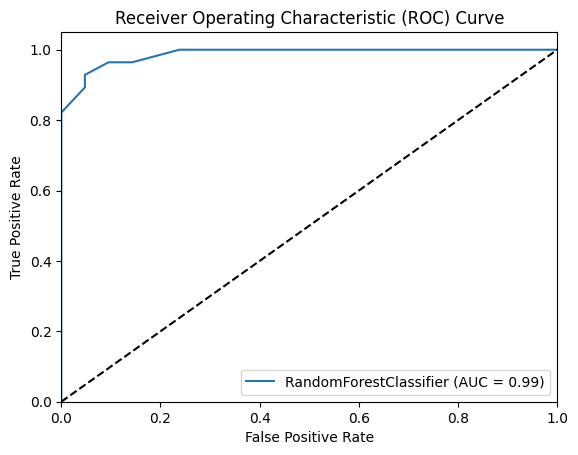

In [ ]:
plt.figure(figsize=(8, 6))
for model in [LogisticRegression(), RandomForestClassifier()]:
    model.fit(X, y)
    y_pred_prob = model.predict_proba(X)[:, 1]
    fpr, tpr, thresholds = roc_curve(y, y_pred_prob)  # Use 'y' instead of 'y_pred'
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
